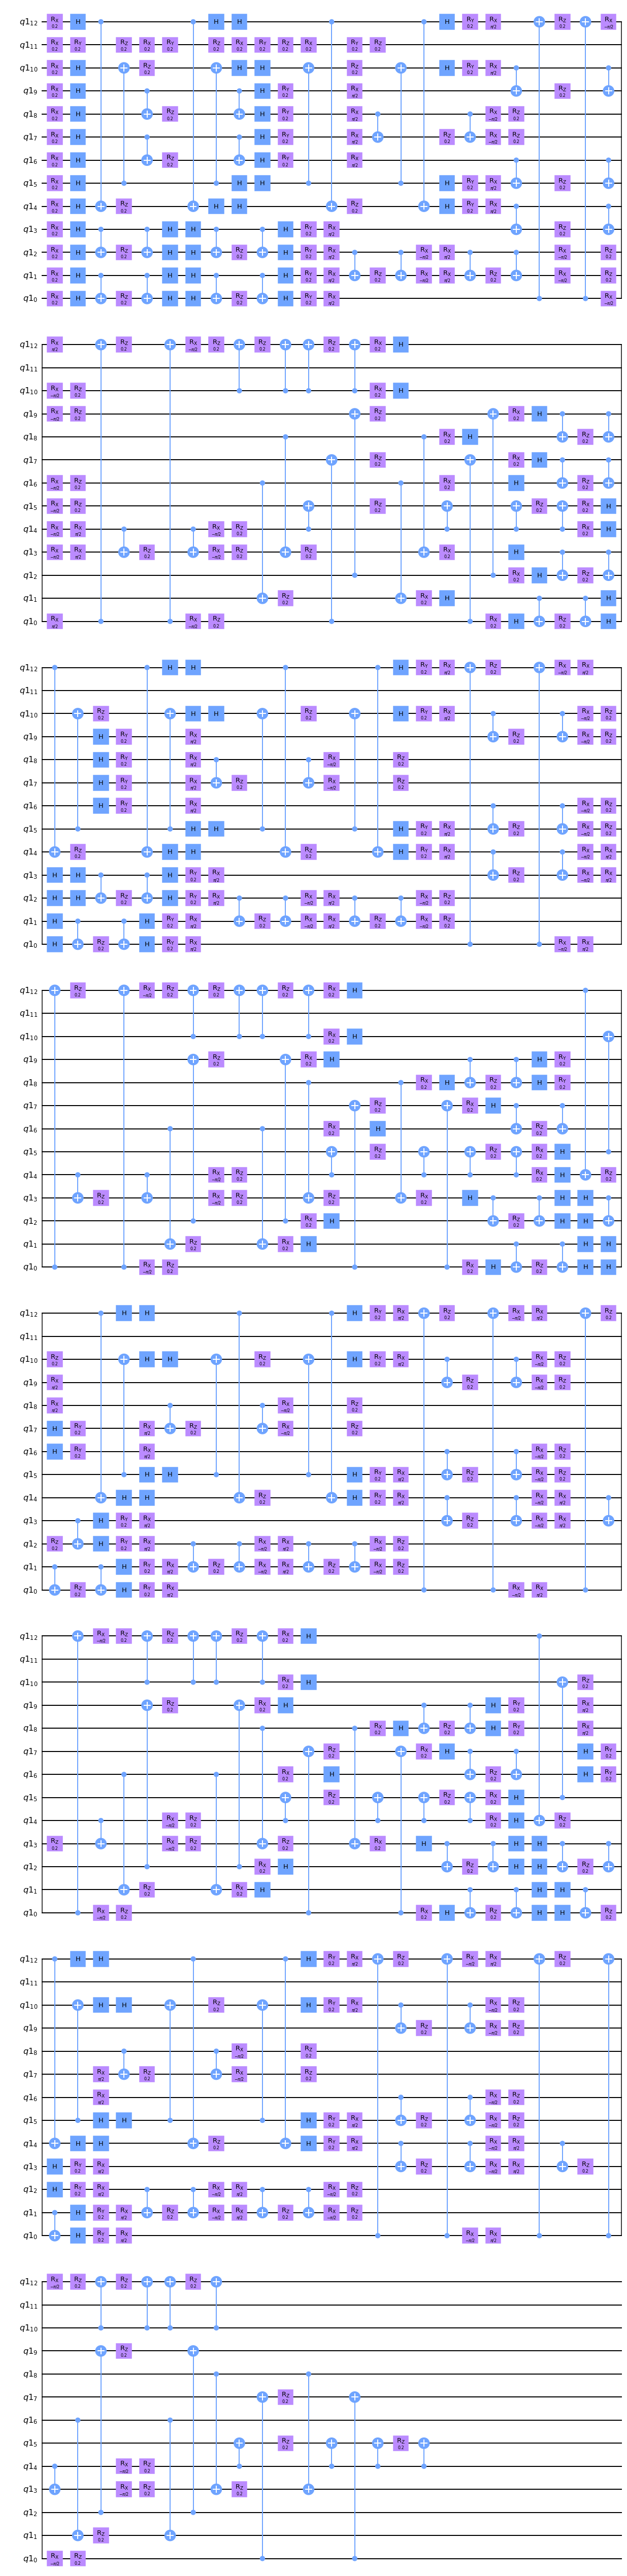

In [2]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
from qiskit import *
from math import sqrt
from math import pi

qubit_number = 13
xp = np.array([1, 2, 3, 4, 5, 0, 11, 6, 7, 8, 9, 10, 11, 6, 5, 0, 1, 2, 3, 4])
yp = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 0, 1, 2, 3, 4, 5])
zp = np.array([0, 11, 2, 7, 4, 9, 0, 11, 6, 5, 8, 1, 10, 3, 6, 5])
nx = int((xp.size)/2)
ny = int((yp.size)/2)
nz = int((zp.size)/2)
par = np.array([0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1])

q = QuantumRegister(qubit_number)
c = ClassicalRegister(qubit_number)
circuit = QuantumCircuit(q, c)
number = int((par.size)/6)
for j in range(number):

    """
    The hamiltonian for X part
    """
    circuit.rx(2 * par[6 * j], range(qubit_number))
    for px in range(nx):
        circuit.h(xp[2*px]-1)
        circuit.h(xp[2*px+1]-1)
        circuit.cnot(xp[2*px+1]-1, xp[2*px]-1)
        circuit.rz(2 * par[(6 * j) + 1], xp[2*px]-1)
        circuit.cnot(xp[2 * px + 1]-1, xp[2 * px]-1)
        circuit.h(xp[2 * px + 1]-1)
        circuit.h(xp[2 * px]-1)
    """
    The hamiltonian for Y part
    """
    circuit.ry(2 * par[(6 * j) + 2], range(qubit_number))
    for py in range(ny):
        circuit.rx(pi/2, yp[2*py]-1)
        circuit.rx(pi/2, yp[2*py+1]-1)
        circuit.cnot(yp[2*py+1]-1, yp[2*py]-1)
        circuit.rz(2 * par[(6 * j) + 3], yp[2*py]-1)
        circuit.cnot(yp[2 * py + 1]-1, yp[2 * py]-1)
        circuit.rx(-pi / 2, yp[2 * py + 1]-1)
        circuit.rx(-pi / 2, yp[2 * py]-1)
    """
    The hamiltonian for Z part
    """
    circuit.rz(2 * par[(6 * j) + 4], range(qubit_number))
    for pz in range(nz):
        circuit.cnot(zp[2*pz+1]-1, zp[2*pz]-1)
        circuit.rz(2 * par[(6 * j) + 5], zp[2*pz]-1)
        circuit.cnot(zp[2*pz+1]-1, zp[2*pz]-1)

circuit.draw(output='mpl',reverse_bits=True,idle_wires=False)#fold=-1)